In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
# 使用Savitzky-Golay滤波器替代滑动平均
from scipy.signal import savgol_filter

In [ ]:
# 读取CSV文件（无表头）
df = pd.read_csv('/home/yokay/gitpool/10-1pwmd.csv', header=None)

# 提取数据列（假设格式为：时间1, 通道1, 时间2, 通道2）
time1 = df[0].astype(float)  # 第一列时间（秒）
time2 = df[2].astype(float)  # 第三列时间（秒）
channel1 = df[1].astype(float)  # 第二列通道0.5波形
channel2 = df[3].astype(float)  # 第四列通道2波形

In [ ]:
# # 读取CSV文件（无表头）
# df = pd.read_csv('/home/yokay/gitpool/2-0.5Tx.csv', header=None)

# # 提取数据列（假设格式为：时间0.5, 通道0.5, 时间2, 通道2）
# time0.5 = df[9].astype(float)  # 第一列时间（秒）
# channel1 = df[10].astype(float)  # 第二列通道1波形
# time2 = df[21].astype(float)  # 第二列时间（秒）
# channel2 = df[22].astype(float)  # 第四列通道2波形

In [ ]:
# 创建画布和坐标轴
plt.figure(figsize=(12, 6))


window_size = 11  # 必须为奇数
smooth_ch1 = savgol_filter(channel1, window_size, 3)  # 三次多项式
smooth_ch2 = savgol_filter(channel2, window_size, 3)

# 由于Savitzky-Golay保持数组长度不变，直接使用原时间序列
smooth_time1 = time1[:]
smooth_time2 = time2[:]

# 绘制时应保持维度一致（保持不变）
plt.plot(smooth_time1[-200:], smooth_ch1[-200:], label='Channel 1 (Smoothed)', alpha=0.8)
plt.plot(smooth_time2[-200:], smooth_ch2[-200:], label='Channel 2 (Smoothed)', alpha=0.8)
#plt.plot(smooth_time1[-200:], channel1[-200:], label='Channel 1 (Raw)', alpha=0.3)

# 添加图形元素
plt.title('Dual Channel Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')  # 修改单位
plt.grid(True)
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

Channel 1 cross at times: [-0.0000205001, -0.0000202503, -0.0000200003, -0.0000197504, -0.0000195003, -0.0000192504, -0.0000190004, -0.0000187505, -0.0000185004, -0.0000182505, -0.0000180005, -0.0000177505, -0.0000175004, -0.0000172505, -0.0000170005, -0.0000167506, -0.0000165005, -0.0000162506, -0.0000160006, -0.0000157506, -0.0000155006, -0.0000152506, -0.0000150006, -0.0000147506, -0.0000145006, -0.0000142506, -0.0000140005, -0.0000137506, -0.0000135005, -0.0000132506, -0.0000130005, -0.0000127505, -0.0000125005, -0.0000122505, -0.0000120006, -0.0000117506, -0.0000115006, -0.0000112506, -0.0000110006, -0.0000107506, -0.0000105006, -0.0000102506, -0.0000100007, -0.0000097507, -0.0000095007, -0.0000092507, -0.0000090007, -0.0000087507, -0.0000085007, -0.0000082507, -0.0000080007, -0.0000077507, -0.0000075007, -0.0000072508, -0.0000070007, -0.0000067507, -0.0000065007, -0.0000062507, -0.0000060007, -0.0000057507, -0.0000055007, -0.0000052507, -0.0000050007, -0.0000047507, -0.0000045007

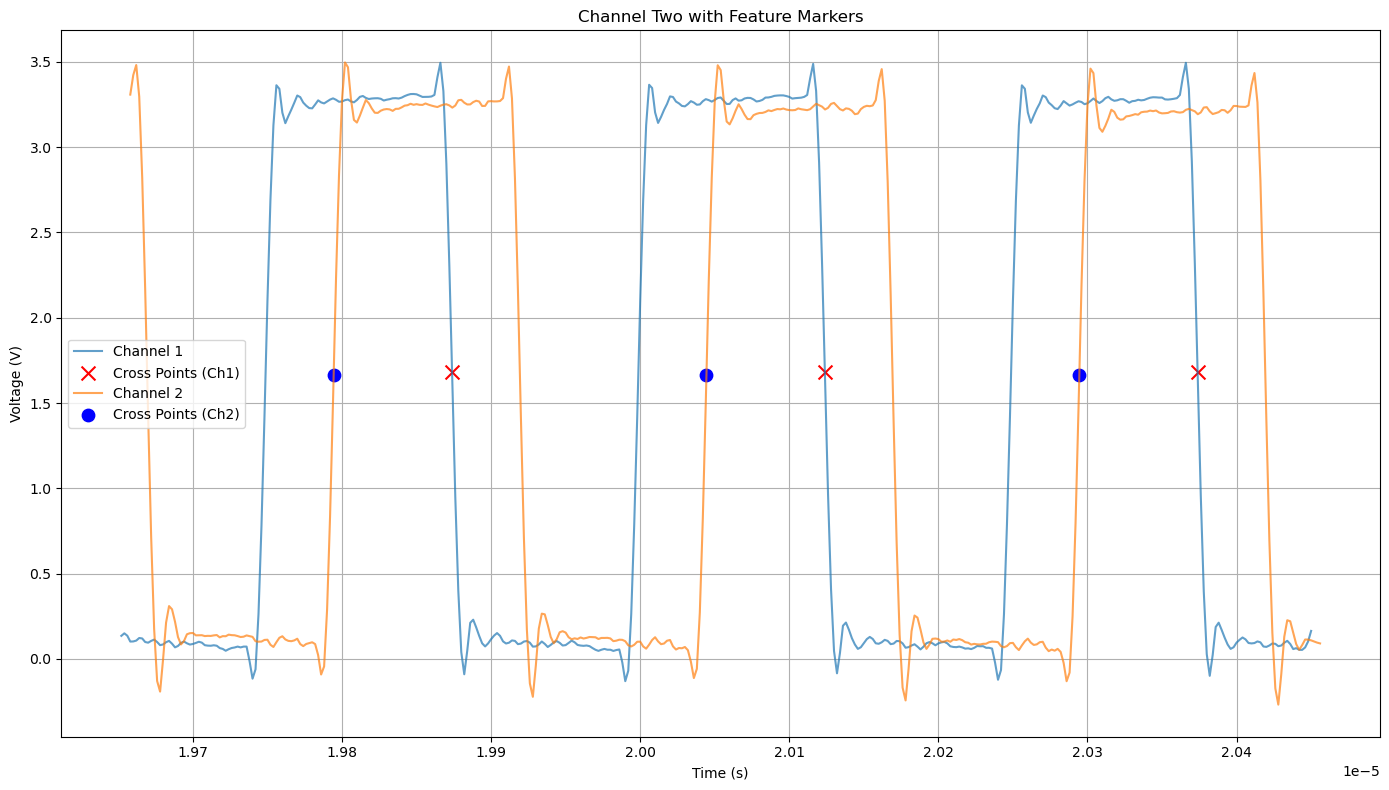

In [ ]:
sel_datalen = 400
# 上升沿中点检测（线性插值）
ch1_mean = np.mean(smooth_ch1)
# 寻找所有候选边沿索引
cross_RISE_points1 = np.where((smooth_ch1[:-1] < ch1_mean) & (smooth_ch1[1:] >= ch1_mean))[0]
# 线性插值计算精确时间
ch1_cross_RISE_times = [smooth_time1[i] + (ch1_mean - smooth_ch1[i]) * 
                  (smooth_time1[i+1] - smooth_time1[i]) / 
                  (smooth_ch1[i+1] - smooth_ch1[i]) for i in cross_RISE_points1]
cross_FALL_points1 = np.where((smooth_ch1[:-1] > ch1_mean) & (smooth_ch1[1:] <= ch1_mean))[0]
# 线性插值计算精确时间
ch1_cross_FALL_times = [smooth_time1[i] + (ch1_mean - smooth_ch1[i]) * 
                  (smooth_time1[i+1] - smooth_time1[i]) / 
                  (smooth_ch1[i+1] - smooth_ch1[i]) for i in cross_FALL_points1]

# 通道2下降沿检测（同理）
ch2_mean = np.mean(smooth_ch2)
# 寻找候选边沿索引（反向条件）
cross_RISE_points2 = np.where((smooth_ch2[:-1] < ch2_mean) & (smooth_ch2[1:] >= ch2_mean))[0]
ch2_cross_RISE_times = [smooth_time2[i] + (ch2_mean - smooth_ch2[i]) * 
                  (smooth_time2[i+1] - smooth_time2[i]) / 
                  (smooth_ch2[i+1] - smooth_ch2[i]) for i in cross_RISE_points2]
cross_FALL_points2 = np.where((smooth_ch2[:-1] > ch2_mean) & (smooth_ch2[1:] <= ch2_mean))[0]
ch2_cross_FALL_times = [smooth_time2[i] + (ch2_mean - smooth_ch2[i]) * 
                  (smooth_time2[i+1] - smooth_time2[i]) / 
                  (smooth_ch2[i+1] - smooth_ch2[i]) for i in cross_FALL_points2]

# 创建双通道可视化图形
plt.figure(figsize=(14, 8))
# 通道1波形及标记
view_range = slice(-sel_datalen,None)
# 获取视图时间范围（安全访问）
view_segment = smooth_time1[view_range]
view_time_start = view_segment.iat[0] if len(view_segment) > 0 else 0
view_time_end = view_segment.iat[-1] if len(view_segment) > 0 else 0

# 通道1波形及标记
plt.plot(smooth_time1[view_range], smooth_ch1[view_range], label='Channel 1', alpha=0.7)
# 过滤视图范围内的交叉点
visible_RISE_cross1 = [t for t in ch1_cross_RISE_times if view_time_start <= t <= view_time_end]
plt.scatter(visible_RISE_cross1, 
            [ch1_mean] * len(visible_RISE_cross1),
            c='red', marker='x', s=100, label='Cross Points (Ch1)')
visible_FALL_cross1 = [t for t in ch1_cross_FALL_times if view_time_start <= t <= view_time_end]
plt.scatter(visible_FALL_cross1, 
            [ch1_mean] * len(visible_FALL_cross1),
            c='red', marker='x', s=100, label='Cross Points (Ch1)')

plt.plot(smooth_time2[view_range],smooth_ch2[view_range], label='Channel 2', alpha=0.7)
# 通道2同理修改
view_segment2 = smooth_time2[view_range]
view_time_start2 = view_segment2.iat[0] if len(view_segment2) > 0 else 0
view_time_end2 = view_segment2.iat[-1] if len(view_segment2) > 0 else 0
visible_RISE_cross2 = [t for t in ch2_cross_RISE_times if view_time_start2 <= t <= view_time_end2]
plt.scatter(visible_RISE_cross2,
            [ch2_mean] * len(visible_RISE_cross2),
            c='blue', marker='o', s=80, label='Cross Points (Ch2)')
visible_FALL_cross2 = [t for t in ch2_cross_FALL_times if view_time_start2 <= t <= view_time_end2]
plt.scatter(visible_FALL_cross2,
            [ch2_mean] * len(visible_FALL_cross2),
            c='blue', marker='o', s=80, label='Cross Points (Ch2)')

# 修改后的打印输出
print("Channel 1 cross at times: [{}]".format(", ".join("{0:.10f}".format(x) for x in ch1_cross_RISE_times)))
print("Channel 2 cross at times: [{}]".format(", ".join("{0:.10f}".format(x) for x in ch2_cross_RISE_times)))


# 通道2波形及标记
plt.title('Channel Two with Feature Markers')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
    
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()


In [15]:
# 取最小长度进行对齐
min_peak_len = min(len(cross_RISE_points1), len(cross_RISE_points2))
delta_peak = smooth_time1.values[ch1_cross_RISE_times[:min_peak_len]] - smooth_time2.values[cross_RISE_points2[:min_peak_len]]

print(delta_peak)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [208]:
# 修改过滤逻辑
def filter_above_mean(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    upper_limit = mean_val + 1 * std_val  # 添加2倍标准差上限
    lower_limit = mean_val - 1 * std_val  # 添加2倍标准差下限
    return data[(data > lower_limit) & (data <= upper_limit)], mean_val, upper_limit, lower_limit


Peak Mean: 42.56 ns Upper Limit: 44.65 ns Lower Limit: 40.47 ns
Valley Mean: 43.03 ns Upper Limit: 45.03 ns Lower Limit: 41.03 ns
New Peak Mean: 42.97 ns
New Valley Mean: 42.75 ns


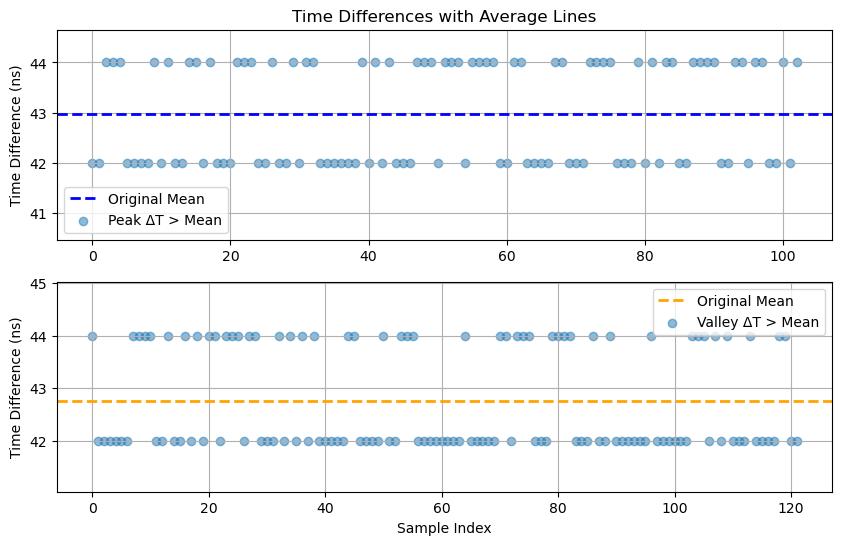

In [209]:
# 转换为纳秒
delta_peak_ns = abs(delta_peak) * 1e9
delta_valley_ns = abs(delta_valley) * 1e9

# 创建散点图
plt.figure(figsize=(10, 6))

# 应用新过滤方法
filtered_peak, peak_mean, upper_peak_lim, lower_peak_lim = filter_above_mean(delta_peak_ns)
filtered_valley, valley_mean, upper_valley_lim ,lower_valley_lim= filter_above_mean(delta_valley_ns)
print(f"Peak Mean: {peak_mean:.2f} ns", f"Upper Limit: {upper_peak_lim:.2f} ns",f"Lower Limit: {lower_peak_lim:.2f} ns")
print(f"Valley Mean: {valley_mean:.2f} ns", f"Upper Limit: {upper_valley_lim:.2f} ns",f"Lower Limit: {lower_valley_lim:.2f} ns")

new_peak_mean = np.mean(filtered_peak)
new_valley_mean = np.mean(filtered_valley)
print(f"New Peak Mean: {new_peak_mean:.2f} ns")
print(f"New Valley Mean: {new_valley_mean:.2f} ns")
# 修改绘图部分
plt.subplot(2, 1, 1)
plt.axhline(y=new_peak_mean, color='blue', linestyle='--', linewidth=2, label='Original Mean')
plt.scatter(range(len(filtered_peak)), filtered_peak, alpha=0.5, label='Peak ΔT > Mean')
plt.ylim(lower_peak_lim, upper_peak_lim)
plt.ylabel('Time Difference (ns)')
plt.title('Time Differences with Average Lines')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.axhline(y=new_valley_mean, color='orange', linestyle='--', linewidth=2, label='Original Mean')
plt.scatter(range(len(filtered_valley)), filtered_valley, alpha=0.5, label='Valley ΔT > Mean')
plt.ylim(lower_valley_lim, upper_valley_lim)
plt.xlabel('Sample Index')
plt.ylabel('Time Difference (ns)')
plt.legend()
plt.grid(True)

plt.show()

In [210]:
# 更新统计显示（改为峰谷差平均值）
stats = []
table_data = []
def calc_nearest_diff(arr1, arr2):
    """计算arr1中每个元素与arr2中最近元素的差值"""
    diffs = []
    for t in arr1:
        if len(arr2) == 0:
            diffs.append(np.nan)
            continue
        nearest_idx = np.argmin(np.abs(arr2 - t))
        diffs.append(t - arr2[nearest_idx])
    return np.array(diffs)

# 在统计计算部分修改为：
# 计算跨通道最邻近差值
cross_peak_diffs = calc_nearest_diff(smooth_time1.values[peaks1], smooth_time2.values[peaks2])
valid_peak_diffs = cross_peak_diffs[~np.isnan(cross_peak_diffs)]*1e9

cross_valley_diffs = calc_nearest_diff(smooth_time1.values[valleys1], smooth_time2.values[valleys2]) 
valid_valley_diffs = cross_valley_diffs[~np.isnan(cross_valley_diffs)]*1e9

# 修正平均值计算并添加异常值过滤
def filter_outliers(data):
    if len(data) == 0:
        return data, np.nan, np.nan
    mean_val = np.mean(data)
    std_val = np.std(data)
    # 保留 [mean - std, mean + std] 范围内的数据
    lower_bound = mean_val - std_val
    upper_bound = mean_val + std_val
    filtered = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered, mean_val, (lower_bound, upper_bound)

# 应用过滤
filtered_peaks, peak_avg, (peak_low, peak_high) = filter_outliers(valid_peak_diffs)
filtered_valleys, valley_avg, (valley_low, valley_high) = filter_outliers(valid_valley_diffs)

# 新增打印过滤后的均值
print(f"New Filtered Peak Mean: {np.mean(filtered_peaks):.2f} ns" if len(filtered_peaks) > 0 else "No valid peaks")
print(f"New Filtered Valley Mean: {np.mean(filtered_valleys):.2f} ns" if len(filtered_valleys) > 0 else "No valid valleys")

filter_sum_mean = (np.mean(filtered_peaks)+np.mean(filtered_valleys))/2
print(f"New Filtered Sum Mean: {filter_sum_mean:.2f} ns")

# 更新到DataFrame
diff_data = []
for diff in filtered_peaks:
    diff_data.append({'Type': 'Peak', 'Status': 'Normal', 'Value (ns)': diff})
for diff in filtered_valleys:
    diff_data.append({'Type': 'Peak', 'Status': 'Outlier', 'Value (ns)': diff})
# 重复相同处理逻辑给valley...

# 生成DataFrame
df = pd.DataFrame(diff_data)

# 保留原有统计信息（可选）
stats_df = pd.DataFrame(
    table_data,
    columns=['Channel', 'Peak Count', 'Avg Peak Interval', 'Avg Valley Interval']
)



New Filtered Peak Mean: -42.97 ns
New Filtered Valley Mean: -42.75 ns
New Filtered Sum Mean: -42.86 ns


In [211]:
df

,Type,Status,Value (ns)
0,Peak,Normal,-42.0
1,Peak,Normal,-42.0
2,Peak,Normal,-44.0
3,Peak,Normal,-44.0
4,Peak,Normal,-44.0
...,...,...,...
220,Peak,Outlier,-42.0
221,Peak,Outlier,-44.0
222,Peak,Outlier,-44.0
223,Peak,Outlier,-42.0
